### Fruits Classification Example

Example of classifications with fruits dataset which contains color feature.

In [38]:
# Importing libs, modules and setting graphic view mode for matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [55]:
# reading data
fruits = pd.read_table("../../datasets/fruit_data_with_colors.txt")

#### Exploring and analysing data

In [40]:
# checking lines and columns count
fruits.shape

(59, 7)

In [41]:
# viewing first two lines (the head) of the dataset.
fruits.head(2)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59


In [42]:
# Selecting the column 'mass'
fruits['mass']

0     192
1     180
2     176
3      86
4      84
5      80
6      80
7      76
8     178
9     172
10    166
11    172
12    154
13    164
14    152
15    156
16    156
17    168
18    162
19    162
20    160
21    156
22    140
23    170
24    342
25    356
26    362
27    204
28    140
29    160
30    158
31    210
32    164
33    190
34    142
35    150
36    160
37    154
38    158
39    144
40    154
41    180
42    154
43    194
44    200
45    186
46    216
47    196
48    174
49    132
50    130
51    116
52    118
53    120
54    116
55    116
56    116
57    152
58    118
Name: mass, dtype: int64

In [43]:
# selecting three first lines
fruits[:3]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


In [44]:
# selecting the three first lines from 'mass' column
fruits['mass'][:3]

0    192
1    180
2    176
Name: mass, dtype: int64

In [45]:
# count by fruit_name
freq = fruits['fruit_name'].value_counts()
freq

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

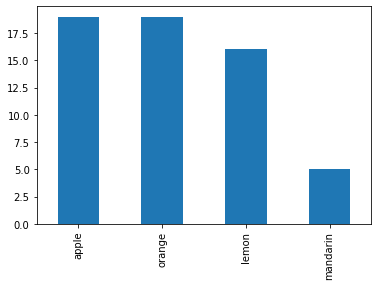

In [46]:
# plotting freq data
freq.plot(kind = 'bar')
plt.show()

In [49]:
# slicing by logical vectors
apples = fruits['fruit_name'] == 'apple'
apples

0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
Name: fruit_name, dtype: bool

In [50]:
fruits[apples]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69


In [52]:
heavy = fruits['mass'] > 175
fruits[apples & heavy]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92


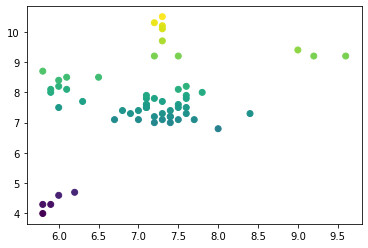

In [61]:
# plotting data
x1 = fruits['width']
x2 = fruits['height']
plt.scatter(x1, x2, c = x2)
plt.show()

#### Training and Test

In [62]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### K-NN no Scitkit Learn

In [90]:
# importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# creating a model with value 5 to the n_neighbors parameter
knn = KNeighborsClassifier(n_neighbors = 5)

In [91]:
# training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
# evaluating the model
knn.score(X_test, y_test)

0.5333333333333333

In [98]:
# first example: a small fruit with mass 20g, width 4,3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.69]])
print(fruit_prediction)


[2]
